<a href="https://colab.research.google.com/github/netobrandao/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

Carregando dados

In [2]:
train = 'https://raw.githubusercontent.com/netobrandao/Titanic/main/train.csv'
test = 'https://raw.githubusercontent.com/netobrandao/Titanic/main/test.csv'
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#mostrando os tipos de dados
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Variaveis Qualitativas e Quantitativas

In [5]:
#Separando Variaveis qualitativas e quantitativas
quanti = list(train_data.select_dtypes(exclude=object))
quali = list(train_data.select_dtypes(include=object))
print(quanti)
print(quali)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
#estatistica descritiva das variaveis quantitativas

train_data[quanti].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#estatistica descritiva das variaveis qualitativas

for i in quali:
    if i == 'Name':
        pass
    else:
        print('----------------------')
        print('Variavel: ',i)
        print(train_data[i].value_counts())
        print('----------------------')
    

----------------------
Variavel:  Sex
male      577
female    314
Name: Sex, dtype: int64
----------------------
----------------------
Variavel:  Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
----------------------
----------------------
Variavel:  Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
----------------------
----------------------
Variavel:  Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
----------------------


Tratamendo de dados nulos

In [8]:
#Tabela de Dados Nulos
nulos = pd.DataFrame(train_data.isnull().sum(),columns=['Quantidade']).reset_index()
nulos.rename(columns={'index':'Variavel'},inplace=True)
nulos['Percentual'] = nulos['Quantidade']/train_data['PassengerId'].count().sum()
nulos

,Variavel,Quantidade,Percentual
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,0.198653
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


In [9]:
#preencher dados nulos

#age - preencher com a media

train_data['Age'] = train_data['Age'].fillna(train_data.Age.mean())
    

In [10]:
#embarked - preencher com a moda
print('A moda de "Embarked" é ', train_data['Embarked'].mode()[0])
train_data['Embarked'] = train_data['Embarked'].astype(str)
train_data['Embarked'] = train_data['Embarked'].str.replace('nan','S')

A moda de "Embarked" é  S


In [11]:
#preencher cabin

#separar os datasets por classe
td1 = train_data.query("Pclass == 1")
td2 = train_data.query("Pclass == 2")
td3 = train_data.query("Pclass == 3")

#Verificar moda de cabin em cada pclass

td1['Cabin'].mode()
td2['Cabin'].mode()
td3['Cabin'].mode()

#preencher cabin usando a moda de cada pclass
td1['Cabin'] = td1['Cabin'].fillna(random.choice(td1['Cabin'].mode()))
td2['Cabin'] = td2['Cabin'].fillna(random.choice(td2['Cabin'].mode()))
td3['Cabin'] = td3['Cabin'].fillna(random.choice(td3['Cabin'].mode()))

#juntar os datasets

train_data = pd.concat([td1,td2,td3],axis=0)
train_data

<ipython-input-11-379ab6c37da2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td1['Cabin'] = td1['Cabin'].fillna(random.choice(td1['Cabin'].mode()))
<ipython-input-11-379ab6c37da2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td2['Cabin'] = td2['Cabin'].fillna(random.choice(td2['Cabin'].mode()))
<ipython-input-11-379ab6c37da2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,G6,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,G6,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,G6,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S


Visualização dos dados

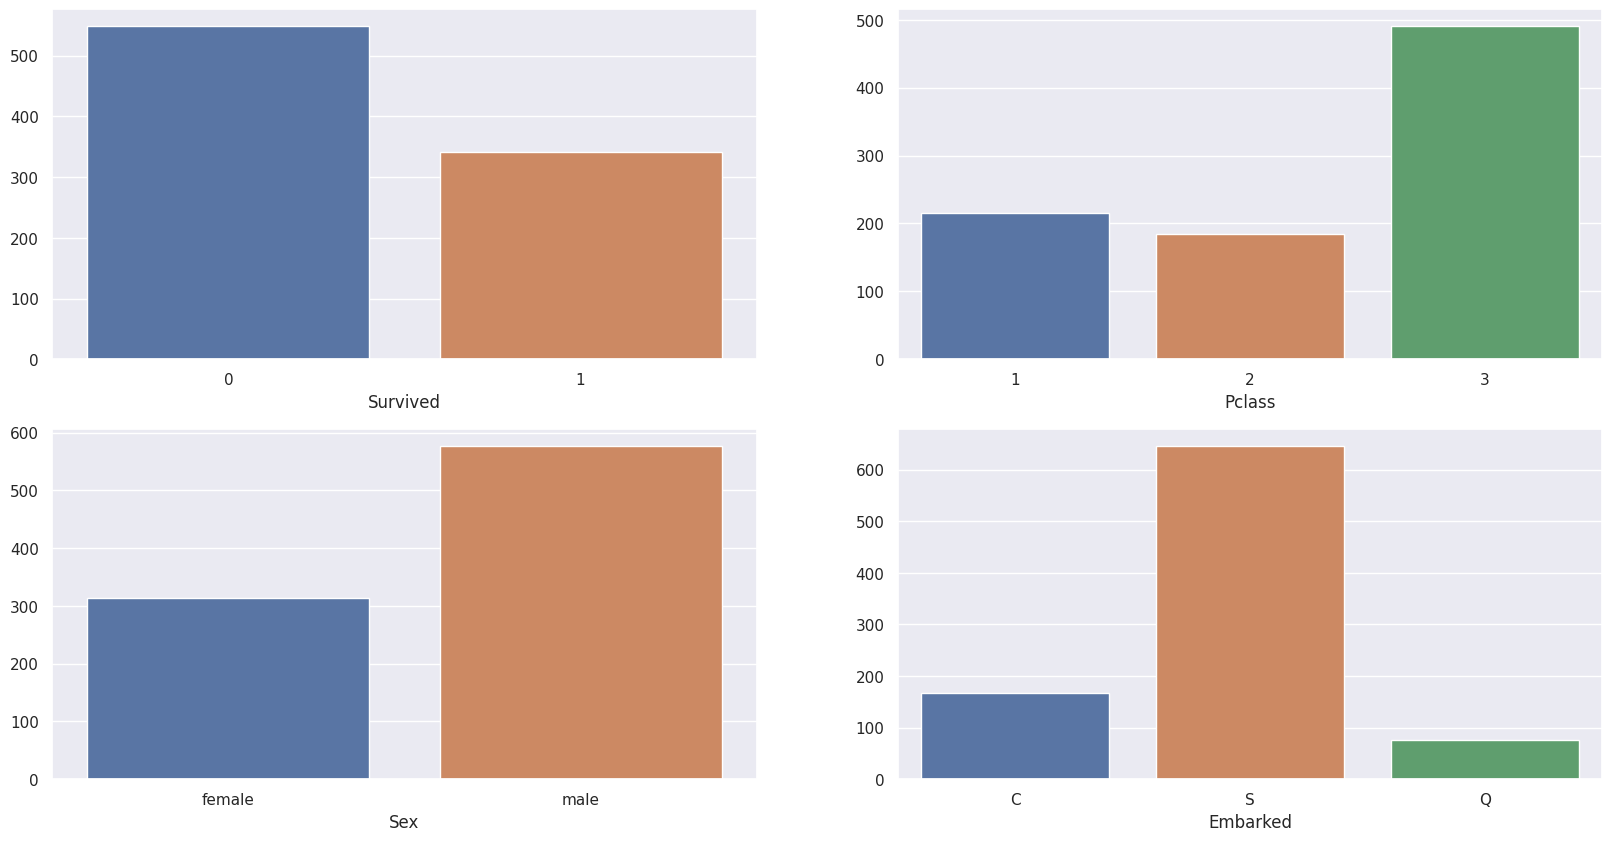

In [12]:
#Graficos de frequencia das variaveis Survived, Pclass, Sex e Embarked
fig = plt.figure(figsize=(20,10))
for i,col in enumerate(train_data[['Survived','Pclass','Sex','Embarked']]):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data=train_data,x=col)
    ax.set_ylabel(None)
plt.show()

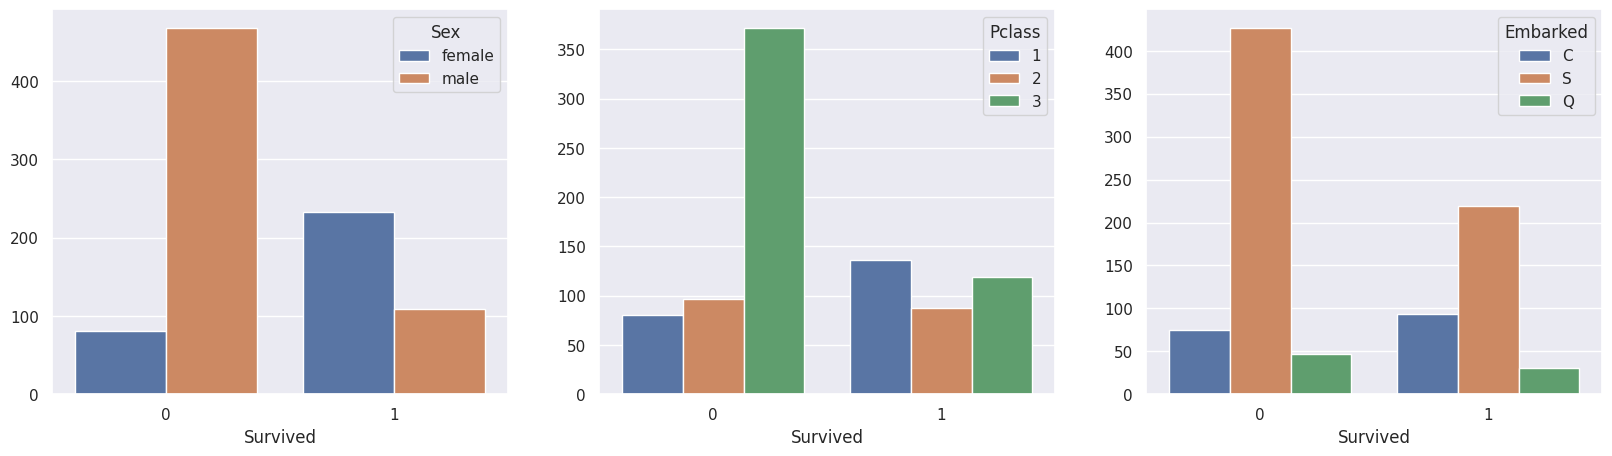

In [13]:
#Grafico survived x Sex,Pclass,Embarked
fig1 = plt.figure(figsize=(20,5))
for i,col in enumerate(train_data[['Sex','Pclass','Embarked']]):
    ax = plt.subplot(1,3,i+1)
    sns.countplot(data=train_data,x='Survived',hue=col)
    ax.set_ylabel(None)

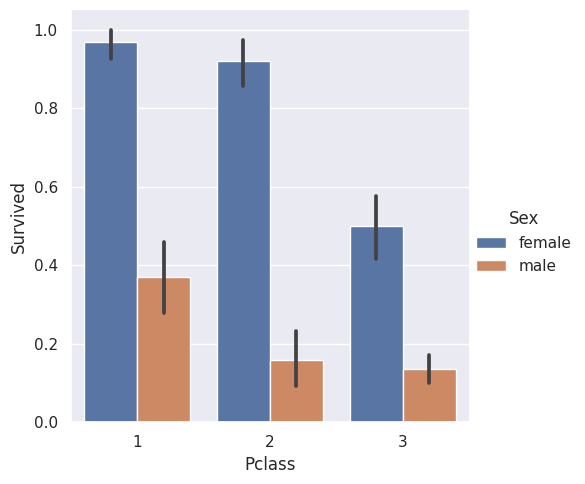

In [14]:
#grafico de sobreviventes em relação ao sexo e a classe
sns.catplot(x='Pclass',y='Survived',hue='Sex', kind='bar', data=train_data)


In [15]:
#detecção de outliers

In [16]:
 #['Survived'].value_counts()